Epoch 1/20
326/326 [==============================] - 83s 245ms/step - loss: 1.7764 - accuracy: 0.3458 - val_loss: 1.4181 - val_accuracy: 0.4879
Epoch 2/20
326/326 [==============================] - 77s 237ms/step - loss: 1.2985 - accuracy: 0.5430 - val_loss: 1.1938 - val_accuracy: 0.5819
Epoch 3/20
326/326 [==============================] - 77s 236ms/step - loss: 1.0906 - accuracy: 0.6219 - val_loss: 1.0395 - val_accuracy: 0.6377
Epoch 4/20
326/326 [==============================] - 75s 230ms/step - loss: 0.9354 - accuracy: 0.6758 - val_loss: 0.9165 - val_accuracy: 0.6886
Epoch 5/20
326/326 [==============================] - 76s 233ms/step - loss: 0.8229 - accuracy: 0.7113 - val_loss: 0.8844 - val_accuracy: 0.6952
Epoch 6/20
326/326 [==============================] - 74s 227ms/step - loss: 0.7408 - accuracy: 0.7416 - val_loss: 0.8314 - val_accuracy: 0.7164
Epoch 7/20
326/326 [==============================] - 74s 227ms/step - loss: 0.6456 - accuracy: 0.7753 - val_loss: 0.8098 - val_ac

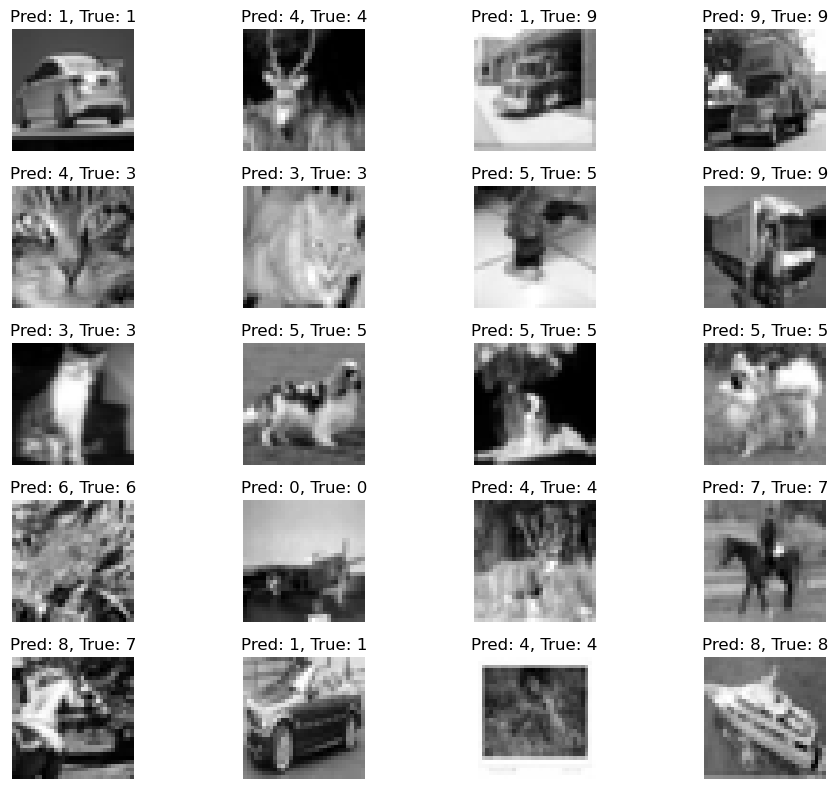

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from skimage.color import rgb2gray

# Load CIFAR-10 dataset and preprocess
(X_train_all, y_train_all), (X_test, y_test) = cifar10.load_data()
X_train_all = X_train_all.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert RGB images to grayscale
X_train_all_gray = rgb2gray(X_train_all)
X_test_gray = rgb2gray(X_test)

# Reshape grayscale images to include channel dimension
X_train_all_gray = np.expand_dims(X_train_all_gray, axis=-1)
X_test_gray = np.expand_dims(X_test_gray, axis=-1)

lb = LabelBinarizer()
y_train_all = lb.fit_transform(y_train_all)
y_test = lb.transform(y_test)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_all_gray, y_train_all, test_size=0.1666, random_state=42)

# Build and train the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same',),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_gray, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Calculate predictions for the entire test set
predictions = model.predict(X_test_gray)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to original labels
true_labels = np.argmax(y_test, axis=1)

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Visualize predictions
num_samples = 20
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
predictions = model.predict(X_test_gray[random_indices])
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 8))
for i, index in enumerate(random_indices):
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test_gray[index].squeeze(), cmap='gray')
    true_label = lb.classes_[np.argmax(y_test[index])]
    predicted_label = lb.classes_[predicted_classes[i]]
    plt.title(f'Pred: {predicted_label}, True: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()
